> **DO NOT EDIT IF INSIDE `caobd_s19` folder** 

# Assignment 3

**Handin in Peergrade**: *Wednesday*, April 3, 2019, 23:59<br>
**Peergrading deadline**: *Wednesday*, April 10, 2019, 23:59<br>
**Peergrading feedback deadline**: *Sunday*, April 13, 2019, 23:59

[**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 7

In [1]:
import re
import nltk
nltk.download('stopwords')

# Get a list of stopwords from nltk
stopwords = nltk.corpus.stopwords.words("english")

def get_clean_words(character_filename, faction):
    def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False
        
    # Load her markup
    with open("./data/%s/%s" % (faction, character_filename)) as fp:
        markup = fp.read()

    # Remove table and external links
    markup_text = re.sub(r'\{\{[\s\S]*?\}\}', '', markup)

    # Remove category links
    markup_text = re.sub(r'\[\[Category.+\]\]', '', markup_text)

    # Set words to lowercase and remove them if they are stop words
    words = [w.lower() for w in re.findall('\w+', markup_text) if w.lower() not in stopwords]

    # Remove numbers
    words = [w for w in words if not _isnum(w)]

    return words

# Example
get_clean_words("Iron man.txt", "heroes")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nathanshirley/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['iron',
 'man',
 'anthony',
 'edward',
 'tony',
 'stark',
 'fictional',
 'superhero',
 'appearing',
 'american',
 'comic',
 'book',
 'published',
 'marvel',
 'comics',
 'character',
 'co',
 'created',
 'writer',
 'editor',
 'stan',
 'lee',
 'developed',
 'scripter',
 'larry',
 'lieber',
 'designed',
 'artists',
 'heck',
 'jack',
 'kirby',
 'character',
 'made',
 'first',
 'appearance',
 'tales',
 'suspense',
 'cover',
 'date',
 'march',
 'received',
 'title',
 'iron',
 'man',
 'comic',
 'book',
 'iron',
 'man',
 'may',
 'wealthy',
 'american',
 'business',
 'magnate',
 'playboy',
 'lifestyle',
 'playboy',
 'ingenious',
 'scientist',
 'anthony',
 'edward',
 'tony',
 'stark',
 'suffers',
 'severe',
 'chest',
 'injury',
 'kidnapping',
 'captors',
 'attempt',
 'force',
 'build',
 'weapon',
 'mass',
 'destruction',
 'instead',
 'creates',
 'iron',
 'man',
 'armor',
 'powered',
 'suit',
 'armor',
 'save',
 'life',
 'escape',
 'captivity',
 'later',
 'stark',
 'develops',
 'suit',
 'adding',

>**Ex. 7.2.1**: For each of the three character classes, compute the sentiment scores across wikipedia articles so that you can produce three histograms (one for each class) with sentiment scores. You can use the text strings you generated in the previous exercise. We will cheat a bit and use a library that does the scoring for us. Install `afinn` using `conda` or `pip` and extract the sentiment with that module. There's an example of how to use it on the library's [PyPi repository](https://pypi.python.org/pypi/afinn).

In [37]:
#get partners graph         
import re, os
import matplotlib.pyplot as plt
hero_text = []
ambig_text = []
vill_text = []

h = './data/heroes'
v = './data/villains'
a = './data/ambiguous'

hero_names = []
vill_names = []
ambig_names = []

folders = [h,v,a]
failed = []

count = 0

for f in folders:
    for filename in os.listdir(f):
        this = []
        if(f == h):
            this = get_clean_words(filename, "heroes")
            tmp = {}
            tmp["name"] = filename
            tmp["length"] = len(this)
            tmp["index"] = count
            hero_names.append(tmp)
            hero_text.append(this)
        if(f == v):
            this = get_clean_words(filename, "villains")
            tmp = {}
            tmp["name"] = filename
            tmp["length"] = len(this)
            tmp["index"] = count
            vill_names.append(tmp)
            vill_text.append(this)
        if(f == a):
            this = get_clean_words(filename, "ambiguous")
            tmp = {}
            tmp["name"] = filename
            tmp["length"] = len(this)
            tmp["index"] = count
            ambig_names.append(tmp)
            ambig_text.append(this)
        count += 1

In [38]:
top_heroes = sorted(hero_names, key = lambda i: i['length'], reverse=True)
top_vill = sorted(vill_names, key = lambda i: i['length'], reverse=True)
top_ambig = sorted(ambig_names, key = lambda i: i['length'], reverse=True)

In [10]:
from afinn import Afinn
afinn = Afinn()

heroes_score = []
vill_score = []
ambig_score = []

h = './data/heroes'
v = './data/villains'
a = './data/ambiguous'
for filename in os.listdir(h):
    fileroute = './data/heroes/' + filename 
    f = open(fileroute, 'r')
    string = ""
    for line in f:
        string = string + line
    score = afinn.score(string)
    heroes_score.append(score)


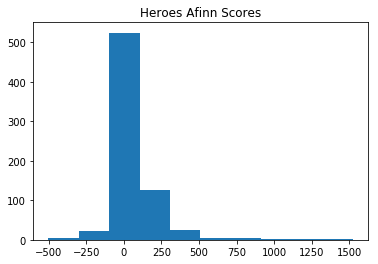

In [11]:
plt.hist(heroes_score)
plt.title("Heroes Afinn Scores")
plt.show()

In [12]:
for filename in os.listdir(v):
    fileroute = './data/villains/' + filename 
    f = open(fileroute, 'r')
    string = ""
    for line in f:
        string = string + line
    score = afinn.score(string)
    vill_score.append(score)

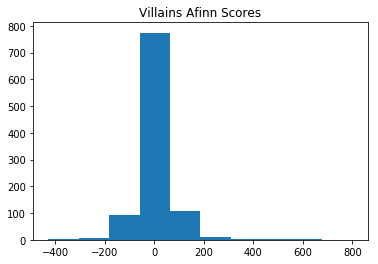

In [13]:
plt.hist(vill_score)
plt.title("Villains Afinn Scores")
plt.show()

In [14]:
for filename in os.listdir(a):
    fileroute = './data/ambiguous/' + filename 
    f = open(fileroute, 'r')
    string = ""
    for line in f:
        string = string + line
    score = afinn.score(string)
    ambig_score.append(score)

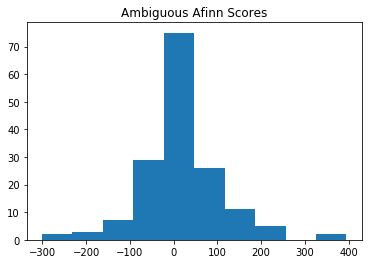

In [15]:
plt.hist(ambig_score)
plt.title("Ambiguous Afinn Scores")
plt.show()

In [46]:
#takes ~5 mins
import numpy as np
bow = []
target_array = []
total_words = []
texts = [vill_text, hero_text, ambig_text]
for ind, category in enumerate(texts):
    for page in category:
        this_row = [0] * 48176
        target_array.append(ind)
        for word in page:
            try:
                i = total_words.index(word)
            except ValueError:
                i = len(total_words)
                word_list.append(word)
                total_words.append(word)
            this_row[i] += 1
        bow.append(this_row)

In [52]:
print(len(ambig_text))
print(len(hero_text))
print(len(vill_text))
print(len(bow))
print(len(total_words))
print(pages_containing_word[:30])

160
717
1000
1877
48176
[780, 26, 1639, 1643, 1491, 1501, 1584, 1547, 1528, 1754, 1780, 74, 1024, 772, 1086, 103, 507, 52, 159, 1175, 5, 5, 1388, 334, 440, 1058, 244, 924, 330, 49]


In [53]:
def getTF(freq,row):
    val = freq / float(len(row))
    return val

def getIDF(matrix):
    num_pages = len(matrix)
    num_containing_word = 0

>**Ex. 7.4.1**: Use any tool you like (you can do it manually, it's straight forward if you understand the method), to perform a TF-IDF transform on your BoW matrix from Ex. 7.3.1. The result should be a matrix of the same shape as the BoW, but with different values inside.
1. Explain what these values mean.
2. For the top three most written about characters in each class (so 9 in total), print out each of their 10 highest scoring words. Comment on any differences you observe in the type of words being used in different classes.

In [49]:
pages_containing_word = [0] * 48176
for row in bow:
    for idx, val in enumerate(row):
            if val > 0:
                pages_containing_word[idx] = pages_containing_word[idx]+1

In [56]:
#creating tf_idf matrix
import math
tf_idf_matrix = []
for row in bow:
    tmp_row = []
    for idx, val in enumerate(row):
        tf = val / float(len(row))
        idf = math.log(1877 / pages_containing_word[idx])
        tf_idf = tf * idf
        tmp_row.append(tf_idf)
    tf_idf_matrix.append(tmp_row)

In [40]:
print(top_heroes[:3])
print(top_vill[:3])
print(top_ambig[:3])

[{'name': 'Psylocke.txt', 'length': 10326, 'index': 52}, {'name': 'Cyclops (Marvel Comics).txt', 'length': 9261, 'index': 441}, {'name': 'Spider-Man.txt', 'length': 8686, 'index': 180}]
[{'name': 'Doctor Octopus.txt', 'length': 9304, 'index': 851}, {'name': 'Loki (comics).txt', 'length': 7911, 'index': 1680}, {'name': 'Vulture (Marvel Comics).txt', 'length': 7210, 'index': 1435}]
[{'name': 'Phoenix Force (comics).txt', 'length': 7812, 'index': 1758}, {'name': 'Emma Frost.txt', 'length': 7654, 'index': 1859}, {'name': 'Sabretooth (comics).txt', 'length': 7398, 'index': 1762}]


## Explaing what "these values" mean

1. Term frequency (TF) is the number of times a specific word appears in a character's page, divided by the total number of words in that character's page. (frequency of word in page / total words in page)
2. Inverse data frequency (IDF) is used to weight rare words higher than common words. Rare words receive a high IDF score. In this case, for each word, we take the total number of character pages divided by the total number of character pages containing that word. Then, we take the log of that. log(# of pages / # of pages containing that word)
3. TF-IDF is simply TF multiplied by IDF for each word. 

Words with high TF-IDF carry significance specific to that character.

In [60]:
psylock = tf_idf_matrix[52]
print(psylock) 
    

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4068387507136411e-06, 1.1014072006886831e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [62]:
print(total_words[10])

comics


### Week 8

>**Ex. 8.2.1**: Modify the script from Ex. 8.1.1 so that it instead of word counts outputs the number of characters, words and lines in the file. Post as your answer in two seperate cells, (1) the code in the script in a code cell, and (2) the terminal output in a markdown cell with the text indented by one tab.

>**Ex. 8.2.3**: Lets go a bit deeper. In this exercise you will implement a MapReduce-MapReduce operation, which computes the same thing as we computed above, but takes as input friend-network data in a slightly more common format: 

>        A B
>        A C
>        A D
>        B C
>        B D
>        B E
>        C D
>        C E
>        D E

>Each line is a "friend-link". The links are undirected and each only occurs once.

>Your job now, is to produce the same output as you did in Ex. 8.2.2, using this input data. To get started faster, use the template below, which shows how to chain together multiple MapReduce steps. Fill out the template and show the output that you get from the terminal when you run it. Clarify whether it corresponds with the output from Ex. 8.2.2.

>*Hint: Try to write the first MapReduce step such that it outputs key-value pairs that correspond to the input data format from Ex. 8.2.2. Then you can reuse your solution to Ex. 8.2.2 in your second MapReduce step.*

>**Ex. 8.2.4**: We can go even further! Let's add a third MapReduce step to count the number of triangles in a network. Again use this input data:

>        A B
>        A C
>        A D
>        B C
>        B D
>        B E
>        C D
>        C E
>        D E

>to validate that your implementation works. It should produce 7 triangles.

>1. Now compute the number of triangles in [this file](http://snap.stanford.edu/data/facebook_combined.txt.gz) which contains 88234 links in an anonymized facebook network. Don't print the whole output, just report the number you get.
>2. Do the same instead using all 2766607 road segments in California as your input. Go to [this site](https://www.cise.ufl.edu/research/sparse/matrices/SNAP/roadNet-CA.html) and download the data in Matrix Market format (`.mtx`). Unzip the file and remove the first 50 lines from it, since that is just markup that we don't need. The file is pretty big so you can expect it to take some time (~4 minutes on my computer). Report the number you get.

>*Hint: Counting triangles is equivalent to counting "common friends". One way to do that is to just count the collective number of common friends that exist in a network. Depending on your implementation you might want to correct your result by a factor 3, since it is likely that you end up counting each triangle three times (one for each point in it).*

>*Nerdy sidenote: Why would anyone want to count triangles??? Well, in network science there is a lot of statistical measures that include the count of triangles in a network. For example, the [clustering coefficient](https://en.wikipedia.org/wiki/Clustering_coefficient), which reveals the proportion of small closed loops in a network, is computed as the number of realized triangles divided by the number of possible triangles.*